In [4]:
import pathpyG as pp
import torch
import copy
import time
import numpy as np
from collections import defaultdict

import pprint 
printer = pprint.PrettyPrinter(indent=4)
pp.config['device'] = 'cpu'
import seaborn as sns

In [ ]:
g = pp.io.read_netzschleuder_graph('reality_mining', time_attr='time')

Mapping node attributes based on node indices in column `index`


Data(edge_index=[2, 2172808], time=[2172808], node__pos=[96], analyses_average_degree=22633.416666666668, analyses_degree_assortativity=0.47204699336753403, analyses_degree_std_dev=21814.46446725327, analyses_diameter=3, analyses_edge_properties=[2], analyses_edge_reciprocity=1.0, analyses_global_clustering=0.8413817881426829, analyses_hashimoto_radius=58.674375265299176, analyses_is_bipartite=False, analyses_is_directed=False, analyses_knn_proj_1=3.5514214936943516, analyses_knn_proj_2=2.0132492259108, analyses_largest_component_fraction=1.0, analyses_mixing_time=19.3400781427721, analyses_num_edges=1086404, analyses_num_vertices=96, analyses_transition_gap=0.9496079163109559, analyses_vertex_properties=[1])

In [5]:
g.data.to(pp.config['device'])
print(g.data.edge_index.device)
event_graph = pp.algorithms.lift_order_temporal(g, delta=3600)
print(event_graph.size(1))

cpu


 11%|█         | 3539/33452 [01:17<10:59, 45.38it/s]


KeyboardInterrupt: 

In [7]:
x = torch.tensor([[0,1],[1,2]]).to('cuda')
y = torch.tensor([[0,1],[1,2]]).to('cuda')
l = [x,y]

print(l)

[tensor([[0, 1],
        [1, 2]], device='cuda:0'), tensor([[0, 1],
        [1, 2]], device='cuda:0')]


In [59]:
def test_mo_scalability(exp):
    res = copy.deepcopy(exp)
    pp.config['device'] = exp['device']
    start_time = time.time()
    g = pp.io.read_netzschleuder_graph(exp['record'], exp['network'], time_attr=exp['time_attr'])
    g.data.to(exp['device'])
    res['read_time_ns'] = time.time() - start_time
    res['temp_net_nodes'] = g.N
    res['temp_net_edges'] = g.M
    res['temp_net_events'] = g.data.edge_index.size(1)

    start_time = time.time()
    eg = pp.algorithms.lift_order_temporal(g, delta=exp['delta'])
    eg.to(exp['device'])
    res['lift_event_graph_time'] = time.time() - start_time
    res['event_graph_edges'] = eg.size(1)

    start_time = time.time()
    m = pp.MultiOrderModel.from_temporal_graph(g, delta=exp['delta'], max_order=exp['max_order'])
    res['mo_time'] = time.time() - start_time
    res['max_order_nodes'] = m.layers[exp['max_order']].N
    res['max_order_edges'] = m.layers[exp['max_order']].M
    return res


In [60]:
results = defaultdict(lambda: defaultdict())
exp = {}
exp['device'] = 'cpu'
exp['record'] = 'copenhagen'
exp['network'] = 'sms'
exp['time_attr'] = 'timestamp'

for delta in np.linspace(1, 3600, 5):

    for k in range(2,4):
        exp['delta'] = delta
        
        exp['max_order'] = k

        res = test_mo_scalability(exp)
        printer.pprint(res)
        results[delta][k] = res

Mapping node attributes based on node indices in column `index`


100%|██████████| 24039/24039 [00:05<00:00, 4341.64it/s]


{   'delta': 1.0,
    'device': 'cpu',
    'event_graph_edges': 89,
    'lift_event_graph_time': 5.45093846321106,
    'max_order': 2,
    'max_order_edges': 34,
    'max_order_nodes': 1303,
    'mo_time': 5.6448304653167725,
    'network': 'sms',
    'read_time_ns': 0.5371692180633545,
    'record': 'copenhagen',
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568,
    'time_attr': 'timestamp'}
Mapping node attributes based on node indices in column `index`


100%|██████████| 24039/24039 [00:06<00:00, 3587.17it/s]


{   'delta': 1.0,
    'device': 'cpu',
    'event_graph_edges': 89,
    'lift_event_graph_time': 6.637180328369141,
    'max_order': 3,
    'max_order_edges': 4,
    'max_order_nodes': 34,
    'mo_time': 6.799363136291504,
    'network': 'sms',
    'read_time_ns': 0.5883340835571289,
    'record': 'copenhagen',
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568,
    'time_attr': 'timestamp'}
Mapping node attributes based on node indices in column `index`


100%|██████████| 24039/24039 [00:09<00:00, 2415.46it/s]


{   'delta': 900.75,
    'device': 'cpu',
    'event_graph_edges': 54271,
    'lift_event_graph_time': 10.089986324310303,
    'max_order': 2,
    'max_order_edges': 1232,
    'max_order_nodes': 1303,
    'mo_time': 10.088692426681519,
    'network': 'sms',
    'read_time_ns': 0.47829651832580566,
    'record': 'copenhagen',
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568,
    'time_attr': 'timestamp'}
Mapping node attributes based on node indices in column `index`


100%|██████████| 24039/24039 [00:09<00:00, 2436.80it/s]


{   'delta': 900.75,
    'device': 'cpu',
    'event_graph_edges': 54271,
    'lift_event_graph_time': 10.420698165893555,
    'max_order': 3,
    'max_order_edges': 1117,
    'max_order_nodes': 1232,
    'mo_time': 10.119099617004395,
    'network': 'sms',
    'read_time_ns': 0.4850621223449707,
    'record': 'copenhagen',
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568,
    'time_attr': 'timestamp'}
Mapping node attributes based on node indices in column `index`


100%|██████████| 24039/24039 [00:09<00:00, 2557.16it/s]


{   'delta': 1800.5,
    'device': 'cpu',
    'event_graph_edges': 77048,
    'lift_event_graph_time': 9.585360288619995,
    'max_order': 2,
    'max_order_edges': 1344,
    'max_order_nodes': 1303,
    'mo_time': 9.54270601272583,
    'network': 'sms',
    'read_time_ns': 0.5124361515045166,
    'record': 'copenhagen',
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568,
    'time_attr': 'timestamp'}
Mapping node attributes based on node indices in column `index`


100%|██████████| 24039/24039 [00:09<00:00, 2552.80it/s]


{   'delta': 1800.5,
    'device': 'cpu',
    'event_graph_edges': 77048,
    'lift_event_graph_time': 9.175652503967285,
    'max_order': 3,
    'max_order_edges': 1305,
    'max_order_nodes': 1344,
    'mo_time': 9.715734481811523,
    'network': 'sms',
    'read_time_ns': 0.4568464756011963,
    'record': 'copenhagen',
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568,
    'time_attr': 'timestamp'}
Mapping node attributes based on node indices in column `index`


100%|██████████| 24039/24039 [00:09<00:00, 2569.76it/s]


{   'delta': 2700.25,
    'device': 'cpu',
    'event_graph_edges': 92451,
    'lift_event_graph_time': 9.429511070251465,
    'max_order': 2,
    'max_order_edges': 1408,
    'max_order_nodes': 1303,
    'mo_time': 9.486212730407715,
    'network': 'sms',
    'read_time_ns': 0.4557836055755615,
    'record': 'copenhagen',
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568,
    'time_attr': 'timestamp'}
Mapping node attributes based on node indices in column `index`


100%|██████████| 24039/24039 [00:09<00:00, 2573.09it/s]


{   'delta': 2700.25,
    'device': 'cpu',
    'event_graph_edges': 92451,
    'lift_event_graph_time': 9.789302349090576,
    'max_order': 3,
    'max_order_edges': 1416,
    'max_order_nodes': 1408,
    'mo_time': 9.676949739456177,
    'network': 'sms',
    'read_time_ns': 0.560659646987915,
    'record': 'copenhagen',
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568,
    'time_attr': 'timestamp'}
Mapping node attributes based on node indices in column `index`


100%|██████████| 24039/24039 [00:09<00:00, 2542.90it/s]


{   'delta': 3600.0,
    'device': 'cpu',
    'event_graph_edges': 105280,
    'lift_event_graph_time': 9.317339897155762,
    'max_order': 2,
    'max_order_edges': 1453,
    'max_order_nodes': 1303,
    'mo_time': 9.582679748535156,
    'network': 'sms',
    'read_time_ns': 0.5140020847320557,
    'record': 'copenhagen',
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568,
    'time_attr': 'timestamp'}
Mapping node attributes based on node indices in column `index`


100%|██████████| 24039/24039 [00:09<00:00, 2508.51it/s]


{   'delta': 3600.0,
    'device': 'cpu',
    'event_graph_edges': 105280,
    'lift_event_graph_time': 9.226924180984497,
    'max_order': 3,
    'max_order_edges': 1506,
    'max_order_nodes': 1453,
    'mo_time': 9.954979658126831,
    'network': 'sms',
    'read_time_ns': 0.43961000442504883,
    'record': 'copenhagen',
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568,
    'time_attr': 'timestamp'}


In [61]:
printer.pprint(results)

defaultdict(<function <lambda> at 0x7f92531c1cf0>,
            {   1.0: defaultdict(None,
                                 {   2: {   'delta': 1.0,
                                            'device': 'cpu',
                                            'event_graph_edges': 89,
                                            'lift_event_graph_time': 5.45093846321106,
                                            'max_order': 2,
                                            'max_order_edges': 34,
                                            'max_order_nodes': 1303,
                                            'mo_time': 5.6448304653167725,
                                            'network': 'sms',
                                            'read_time_ns': 0.5371692180633545,
                                            'record': 'copenhagen',
                                            'temp_net_edges': 24333,
                                            'temp_net_events': 24333,
               

<Axes: >

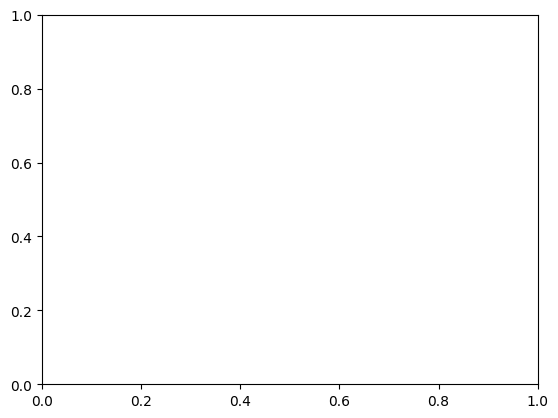

In [58]:
order = [] 
eg_time = []
mo_time = []
delta = 3600.

for k in results[delta]:
    order.append(k)
    eg_time.append(results[delta][k]['lift_event_graph_time'])
    mo_time.append(results[delta][k]['mo_time']-results[delta][k]['lift_event_graph_time'])
sns.lineplot(x=order, y=eg_time, label='event graph')
sns.lineplot(x=order, y=mo_time, label='order lifting')